<center>
    <h1 id='partial-plots' style='color:#7159c1'>🔎 Partial Plots 🔎</h1>
    <i>How does each feature affect the model's predictions in a big-picture sense (what is its typical effect when considered over a large number of possible predictions)?</i>
</center>

---

`Partial Plots` is a technique to find out how the features impact in a single prediction and/or in all predictions in general.

It's like finding the Coefficient in Linear Regression in order to know if a feature is more likely to increase or decrease the prediction's result (when the feature is correlated to the target) or is more likely to don't interfere (when the feature is not correlated to the target).

To use this technique, the model MUST BE FITTED, and the technique works changing the values of a column and making predictions in order to know the general impact of that feature in the target (does the feature increase or decrease the target? And from each value is the impact most notable?).

We can calculate Partial Plots with a single row, but this is atypical and not appropriate, so we should apply it in multiple rows and then we plot the average predicted outcome on the vertical axis.

So we first calculate the Partials and then Plot them!!

In [23]:
# ---- Importations ----
import pandas as pd # pip install pandas

from sklearn.model_selection import train_test_split # pip install sklearn
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import PartialDependenceDisplay

import eli5 # pip install eli5
from eli5.sklearn import PermutationImportance

import matplotlib.pyplot as plt # pip install matplotlib
import mplcyberpunk # pip install cyberpunk

plt.style.use('cyberpunk')

# ---- Preparing Dataset ----
autos_df = pd.read_csv('./datasets/autos.csv')
autos_df = autos_df.select_dtypes(exclude='object')

X = autos_df.copy()
y = X.pop('price')

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y
    , train_size=0.70
    , test_size=0.30
    , random_state=20242301
)

# ---- Preparing the Model ----
random_forest_model = RandomForestRegressor(
    n_estimators=100
    , random_state=20242301
)

random_forest_model.fit(X_train, y_train)

RandomForestRegressor(random_state=20242301)

<h1 id='0-1d-partial-dependence' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>0 | 1D Partial Dependence</h1>

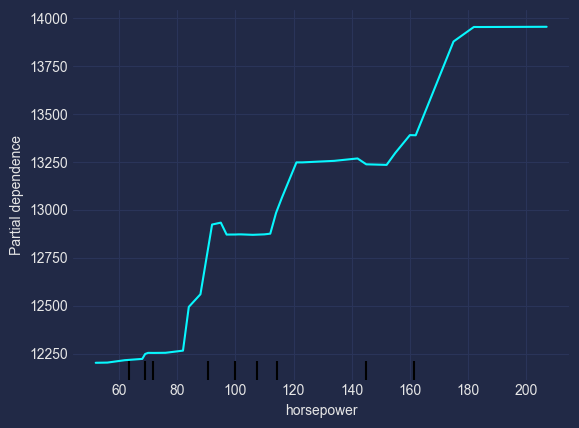

In [34]:
# ---- 1D Partial Plot ----
#
# - https://scikit-learn.org/stable/modules/generated/sklearn.inspection.PartialDependenceDisplay.html
#
dependence_plot_1d = PartialDependenceDisplay.from_estimator(
    random_forest_model
    , X_valid
    , ['horsepower']
    , kind='average'
)
plt.show()

---

About the Partial Plot:

- The y axis is interpreted as CHANGE IN THE PREDICTION from what it would be predicted at the baseline or leftmost value;
	
- From this particular graph, we see that increasing the horsepower substantially increases the car price. But increasing the horsepower a little appears to have a tiny impact on predictions.

<h1 id='1-2d-partial-dependence' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>1 | 2D Partial Dependence</h1>

It's like the common Partial Plots, but calculating TWO FEATURES simultaneously!!

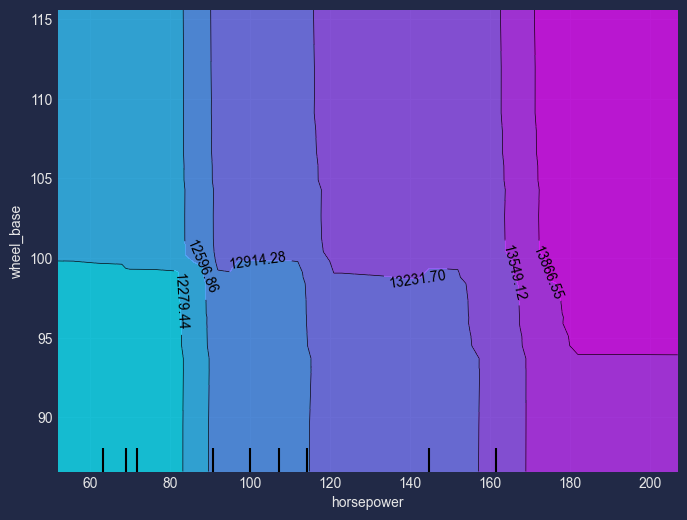

In [38]:
# ---- 2D Partial Plot ----
fig, ax = plt.subplots(figsize=(8, 6))

dependence_plot_2d = PartialDependenceDisplay.from_estimator(
    random_forest_model
    , X_valid
    , [('horsepower', 'wheel_base')]
    , ax=ax
)
plt.show()

---

This graph shows predictions for any combination of Horse Power and Wheel Base covered.

For example, we see the highest predictions when a car has at least 180 horse power and a wheel base of 95. If the horse power if less than 80 and the wheel base is less than 100, the price prediction is the lowest.

---

<h1 id='reach-me' style='color:#7159c1; border-bottom:3px solid #7159c1; letter-spacing:2px; font-family:JetBrains Mono; font-weight: bold; text-align:left; font-size:240%;padding:0'>📫 | Reach Me</h1>

> **Email** - [csfelix08@gmail.com](mailto:csfelix08@gmail.com?)

> **Linkedin** - [linkedin.com/in/csfelix/](https://www.linkedin.com/in/csfelix/)

> **GitHub:** - [CSFelix](https://github.com/CSFelix)

> **Kaggle** - [DSFelix](https://www.kaggle.com/dsfelix)

> **Portfolio** - [CSFelix.io](https://csfelix.github.io/).